Result of the equation after substitution: 125.0
Graph saved as computational_graph_after_substitution


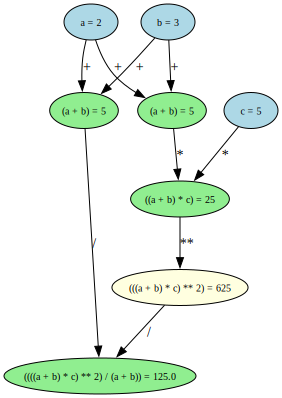

In [2]:
import numpy as np
from graphviz import Digraph, Source

# Step 1: Define a class for the computational graph node
class Node:
    def __init__(self, value, name=""):
        self.value = value  # The numeric or symbolic value this node holds
        self.name = name    # Name of the node (used in visualization)
        self.parents = []   # The nodes that feed into this one
        self.op = None      # The operation (if any) that produced this node

    def __add__(self, other):
        result_value = self.value + other.value
        result = Node(result_value, f"({self.name} + {other.name})")
        result.parents = [self, other]
        result.op = "+"
        return result

    def __mul__(self, other):
        result_value = self.value * other.value
        result = Node(result_value, f"({self.name} * {other.name})")
        result.parents = [self, other]
        result.op = "*"
        return result

    def __sub__(self, other):
        result_value = self.value - other.value
        result = Node(result_value, f"({self.name} - {other.name})")
        result.parents = [self, other]
        result.op = "-"
        return result

    def __truediv__(self, other):
        result_value = self.value / other.value
        result = Node(result_value, f"({self.name} / {other.name})")
        result.parents = [self, other]
        result.op = "/"
        return result

    def __pow__(self, power):
        result_value = self.value ** power
        result = Node(result_value, f"({self.name} ** {power})")
        result.parents = [self]
        result.op = "**"
        return result

    def substitute(self, new_value):
        """Substitutes the value of this node with a new value."""
        self.value = new_value
        self.name = f"{new_value}"  # Update the name to reflect the new value
        for parent in self.parents:
            parent.substitute(parent.value)  # Recursively update parents

    def transpose(self):
        """Transpose operation (for example, if we define a transposition in a matrix context)."""
        # Placeholder for transpose logic; transposition is context-dependent
        # For now, just return the node itself as a demonstration
        return self

# Step 2: Visualize the computational graph using Graphviz and save it as PNG if needed
def visualize_computational_graph_inline(output_node, save_as_png=True, file_path='graph_output.png'):
    dot = Digraph(format='png', node_attr={'style': 'filled', 'fontsize': '10'})

    def add_nodes_edges(node):
        # Define colors for different node types
        if node.op is None:  # Input nodes
            color = 'lightblue'
        else:  # Operation nodes
            color = 'lightgreen' if node.op != '**' else 'lightyellow'

        dot.node(str(id(node)), f"{node.name} = {node.value}", fillcolor=color)

        if node.parents:
            for parent in node.parents:
                dot.edge(str(id(parent)), str(id(node)), label=node.op)
                add_nodes_edges(parent)

    add_nodes_edges(output_node)

    # Render graph and save as PNG if required
    if save_as_png:
        dot.render(file_path, cleanup=True)  # Save as PNG and clean up temporary files
        print(f"Graph saved as {file_path}")
    return Source(dot.source)

# Step 3: Perform more advanced arithmetic operations and build the graph
# Define input nodes with numeric values
a = Node(2, "a")
b = Node(3, "b")
c = Node(5, "c")

# Perform operations and track the forward pass
output = (a + b) * c  # (a + b) * c
output_with_power = output ** 2  # ((a + b) * c) ** 2
output_with_div = output_with_power / (a + b)  # (((a + b) * c) ** 2) / (a + b)

# Let's say we want to substitute 'a' with a new value
#a.substitute(4)  # Change value of 'a' to 4

# Update the output nodes after substitution
output = (a + b) * c
output_with_power = output ** 2
output_with_div = output_with_power / (a + b)

# For a test equation
test_eq = output_with_div
print(f"Result of the equation after substitution: {test_eq.value}")

# Step 4: Visualize the resulting computational graph and save it as a PNG
visualize_computational_graph_inline(test_eq, save_as_png=True, file_path='computational_graph_after_substitution') 